In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the file
meta_df = pd.read_csv('META/meta_ccsd_energies.txt', sep='\s+', header=None, names=['filename', 'value'])

# Extract theta and phi using regex
pattern = r"theta_(.*?)_phi_(.*?)\.json"
meta_df[['theta', 'phi']] = meta_df['filename'].str.extract(pattern).astype(float)

# Drop the filename column, keep only numeric data
meta_df = meta_df[['theta', 'phi', 'value']]

print(meta_df.head())


        theta         phi        value
0  156.521739  203.478261 -3007.791041
1   93.913043  281.739130 -3007.813326
2  172.173913   31.304348 -3007.830701
3  101.739130   31.304348 -3007.790243
4   15.652174   31.304348 -3007.800398


In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the file with flexible whitespace handling
para_df = pd.read_csv(
    'PARA/para_ccsd_energies.txt',
    delim_whitespace=True,    # handles variable spaces/tabs
    header=None,              # no header line in file
    names=['theta', 'phi', 'value']
)

print(para_df.head())
print(f"Loaded {len(para_df)} rows.")

ortho_df = pd.read_csv(
    'ORTHO/ortho_cc_files/ortho_ccsd_energies.txt',
    delim_whitespace=True,
    header=None,
    names = ['theta', 'phi', 'value']
)

print(ortho_df.head())
print(f"Loaded {len(ortho_df)} rows.")

        theta         phi        value
0  125.217391  250.434783 -3007.785053
1   15.652174  125.217391 -3007.825905
2   86.086957  203.478261 -3007.797403
3   31.304348  313.043478 -3007.780657
4  156.521739  125.217391 -3007.791160
Loaded 576 rows.
        theta         phi        value
0   23.478261   31.304348 -3007.804961
1   46.956522  250.434783 -3007.834375
2   31.304348  297.391304 -3007.834489
3  101.739130   93.913043 -3007.811170
4   93.913043    0.000000 -3007.804139
Loaded 576 rows.


/var/folders/hs/493lh3390kv8z7b8n8zv_p580000gp/T/ipykernel_95203/4039049817.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  para_df = pd.read_csv(
/var/folders/hs/493lh3390kv8z7b8n8zv_p580000gp/T/ipykernel_95203/4039049817.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ortho_df = pd.read_csv(


In [3]:
# Pivot to create a grid for heatmap
meta_pivot_df = meta_df.pivot_table(index='theta', columns='phi', values='value')
para_pivot_df = para_df.pivot_table(index='theta', columns='phi', values='value')
ortho_pivot_df = ortho_df.pivot_table(index='theta', columns='phi', values='value')

meta_pivot_df.index = meta_pivot_df.index.round(4)
meta_pivot_df.columns = meta_pivot_df.columns.round(4)
para_pivot_df.index = para_pivot_df.index.round(4)
para_pivot_df.columns = para_pivot_df.columns.round(4)
ortho_pivot_df.index = ortho_pivot_df.index.round(4)
ortho_pivot_df.columns = ortho_pivot_df.columns.round(4)



meta_pivot_df.head()
para_pivot_df.head()
ortho_pivot_df.head()

phi,0.0000,15.6522,31.3043,46.9565,62.6087,78.2609,93.9130,109.5652,125.2174,140.8696,...,219.1304,234.7826,250.4348,266.0870,281.7391,297.3913,313.0435,328.6957,344.3478,360.0000
theta,,,,,,,,,,,,,,,,,,,,,
0.0000,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,...,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266
7.8261,-3007.818650,-3007.816608,-3007.814716,-3007.813120,-3007.811951,-3007.811308,-3007.811244,-3007.811762,-3007.812814,-3007.814309,...,-3007.823770,-3007.825095,-3007.825965,-3007.826316,-3007.826120,-3007.825391,-3007.824181,-3007.822576,-3007.820687,-3007.818650
15.6522,-3007.817388,-3007.813467,-3007.809768,-3007.806592,-3007.804236,-3007.802937,-3007.802831,-3007.803917,-3007.806063,-3007.809042,...,-3007.827031,-3007.829553,-3007.831224,-3007.831904,-3007.831533,-3007.830142,-3007.827845,-3007.824814,-3007.821253,-3007.817388
23.4783,-3007.815671,-3007.810224,-3007.804961,-3007.800326,-3007.796816,-3007.794871,-3007.794744,-3007.796429,-3007.799667,-3007.804023,...,-3007.828879,-3007.832415,-3007.834783,-3007.835745,-3007.835203,-3007.833222,-3007.830003,-3007.825823,-3007.820960,-3007.815671
31.3043,-3007.813711,-3007.807249,-3007.800819,-3007.794959,-3007.790394,-3007.787833,-3007.787698,-3007.789982,-3007.794251,-3007.799782,...,-3007.829299,-3007.833606,-3007.836508,-3007.837669,-3007.836958,-3007.834489,-3007.830567,-3007.825583,-3007.819887,-3007.813711


In [4]:
# print out the values associated with para theta = 180.0 and phi = 0.0
print("Para value at theta=180.0, phi=0.0:", para_pivot_df.loc[180.0, 0.0])
print("Meta value at theta=180.0, phi=0.0:", meta_pivot_df.loc[180.0, 0.0])
print("Ortho value at theta=180.0, phi=0.0:", ortho_pivot_df.loc[180.0, 0.0])

expected_para = -3007.813866912619233
expected_meta = -3007.822188699800336
expected_ortho = -3007.819266318421342
assert np.isclose(meta_pivot_df.loc[180.0, 0.0], expected_meta, 1e-7, 1e-7), "Meta value does not match expected!"
assert np.isclose(para_pivot_df.loc[180.0, 0.0], expected_para, 1e-7, 1e-7), "Para value does not match expected!"
assert np.isclose(ortho_pivot_df.loc[180.0, 0.0], expected_ortho, 1e-7, 1e-7), "Ortho value does not match expected!"

Para value at theta=180.0, phi=0.0: -3007.8138669126192
Meta value at theta=180.0, phi=0.0: -3007.8221886998003
Ortho value at theta=180.0, phi=0.0: -3007.8192663184213


In [5]:
ortho_pivot_df.head()

phi,0.0000,15.6522,31.3043,46.9565,62.6087,78.2609,93.9130,109.5652,125.2174,140.8696,...,219.1304,234.7826,250.4348,266.0870,281.7391,297.3913,313.0435,328.6957,344.3478,360.0000
theta,,,,,,,,,,,,,,,,,,,,,
0.0000,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,...,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266,-3007.819266
7.8261,-3007.818650,-3007.816608,-3007.814716,-3007.813120,-3007.811951,-3007.811308,-3007.811244,-3007.811762,-3007.812814,-3007.814309,...,-3007.823770,-3007.825095,-3007.825965,-3007.826316,-3007.826120,-3007.825391,-3007.824181,-3007.822576,-3007.820687,-3007.818650
15.6522,-3007.817388,-3007.813467,-3007.809768,-3007.806592,-3007.804236,-3007.802937,-3007.802831,-3007.803917,-3007.806063,-3007.809042,...,-3007.827031,-3007.829553,-3007.831224,-3007.831904,-3007.831533,-3007.830142,-3007.827845,-3007.824814,-3007.821253,-3007.817388
23.4783,-3007.815671,-3007.810224,-3007.804961,-3007.800326,-3007.796816,-3007.794871,-3007.794744,-3007.796429,-3007.799667,-3007.804023,...,-3007.828879,-3007.832415,-3007.834783,-3007.835745,-3007.835203,-3007.833222,-3007.830003,-3007.825823,-3007.820960,-3007.815671
31.3043,-3007.813711,-3007.807249,-3007.800819,-3007.794959,-3007.790394,-3007.787833,-3007.787698,-3007.789982,-3007.794251,-3007.799782,...,-3007.829299,-3007.833606,-3007.836508,-3007.837669,-3007.836958,-3007.834489,-3007.830567,-3007.825583,-3007.819887,-3007.813711


In [6]:
para_pivot_df.head()

# difference between ortho and meta
hartree_to_kcalmol = 627.5094740631
diff_pivot_df_ortho_meta = (ortho_pivot_df - meta_pivot_df) * hartree_to_kcalmol
# difference between para and meta
diff_pivot_df_para_meta = (para_pivot_df - meta_pivot_df) * hartree_to_kcalmol



In [7]:
diff_pivot_df_ortho_meta.head()

phi,0.0000,15.6522,31.3043,46.9565,62.6087,78.2609,93.9130,109.5652,125.2174,140.8696,...,219.1304,234.7826,250.4348,266.0870,281.7391,297.3913,313.0435,328.6957,344.3478,360.0000
theta,,,,,,,,,,,,,,,,,,,,,
0.0000,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,...,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822,1.833822
7.8261,-2.232396,-2.203629,-1.836223,-1.132839,-0.139797,1.055163,2.333481,3.562656,4.616776,5.395043,...,4.484497,3.660345,2.770307,1.856218,0.947453,0.070480,-0.740586,-1.437118,-1.957245,-2.232396
15.6522,-6.068891,-6.358249,-5.879485,-4.577506,-2.531588,0.050511,2.863780,5.557749,7.797144,9.325028,...,6.190753,4.629430,3.144797,1.749587,0.389069,-1.005119,-2.455478,-3.897645,-5.174639,-6.068891
23.4783,-9.402727,-10.344862,-10.016123,-8.255224,-5.165818,-1.101748,3.395328,7.689807,11.169196,13.369712,...,6.771425,4.612923,2.891099,1.517865,0.234820,-1.252322,-3.120653,-5.321766,-7.566728,-9.402727
31.3043,-11.986324,-13.891212,-13.974301,-11.925885,-7.869309,-2.322615,3.902465,9.836561,14.532905,17.278754,...,6.136178,3.568033,2.000412,1.180442,0.535127,-0.585553,-2.612650,-5.545417,-8.925390,-11.986324


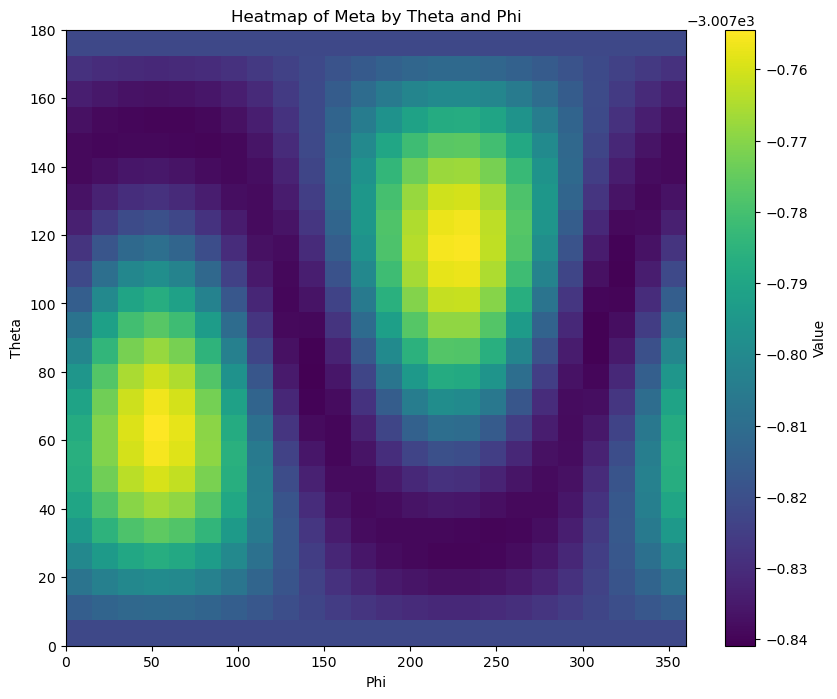

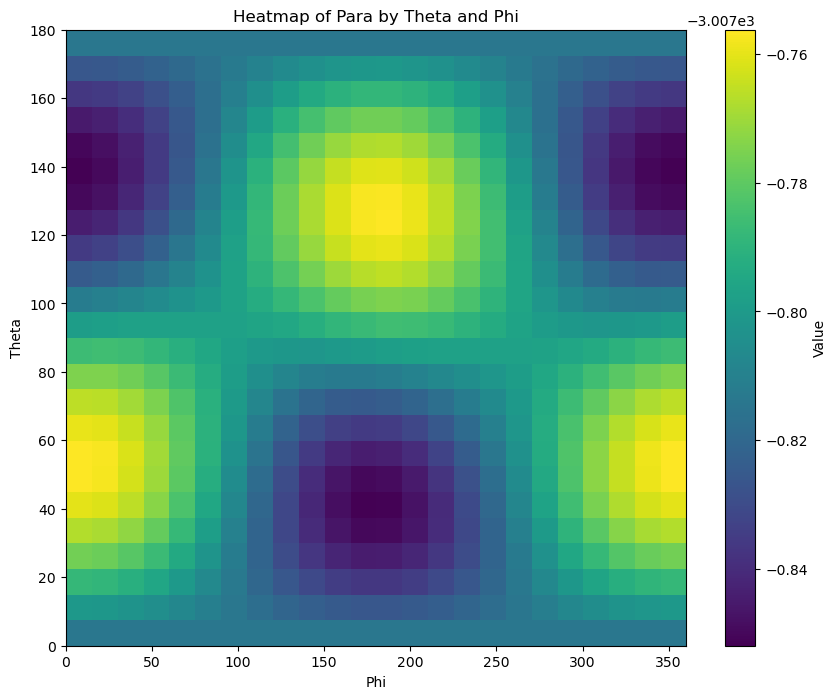

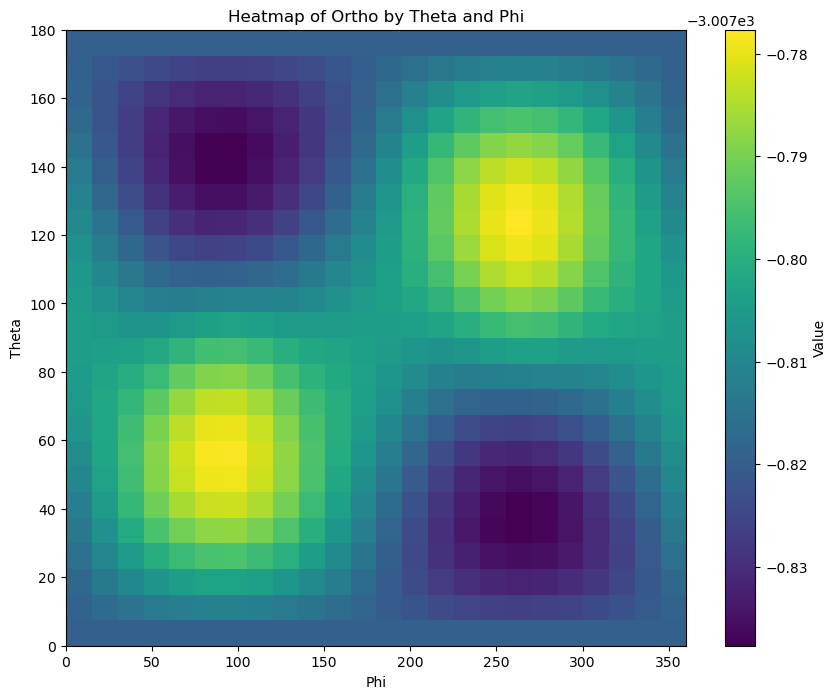

In [8]:

# Plot
plt.figure(figsize=(10, 8))
plt.imshow(meta_pivot_df, aspect='auto', origin='lower',
           extent=[meta_pivot_df.columns.min(), meta_pivot_df.columns.max(),
                   meta_pivot_df.index.min(), meta_pivot_df.index.max()],
           cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Meta by Theta and Phi')
plt.savefig("meta.png", dpi=300)
plt.show()


# Plot
plt.figure(figsize=(10, 8))
plt.imshow(para_pivot_df, aspect='auto', origin='lower',
                   extent=[para_pivot_df.columns.min(), para_pivot_df.columns.max(),
                                   para_pivot_df.index.min(), para_pivot_df.index.max()],
                   cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Para by Theta and Phi')
plt.savefig("para.png", dpi=300)
plt.show()

# Plot ortho data
plt.figure(figsize=(10, 8))
plt.imshow(ortho_pivot_df, aspect='auto', origin='lower',
                   extent=[ortho_pivot_df.columns.min(), ortho_pivot_df.columns.max(),
                                   ortho_pivot_df.index.min(), ortho_pivot_df.index.max()],
                   cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Ortho by Theta and Phi')
plt.savefig("ortho.png", dpi=300)
plt.show()





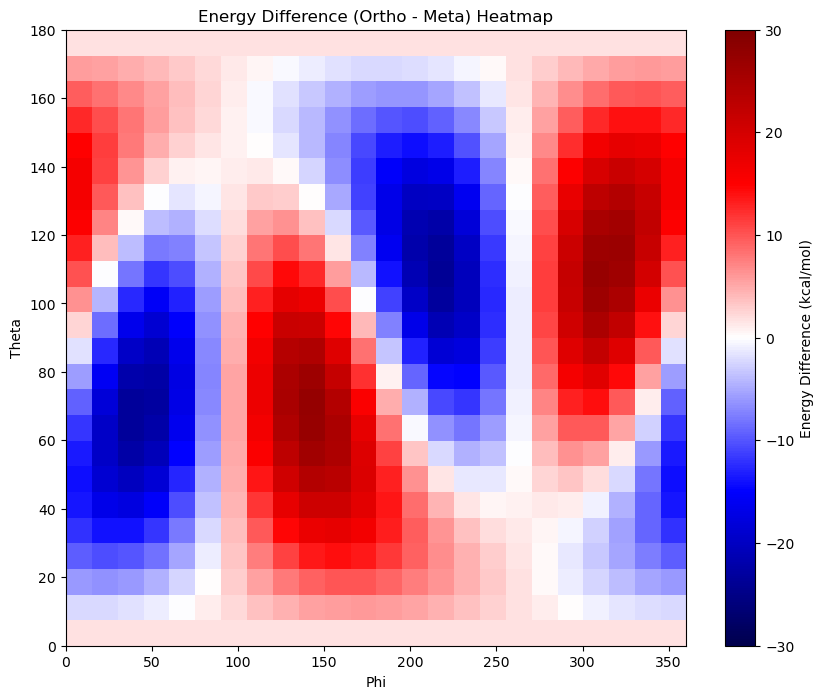

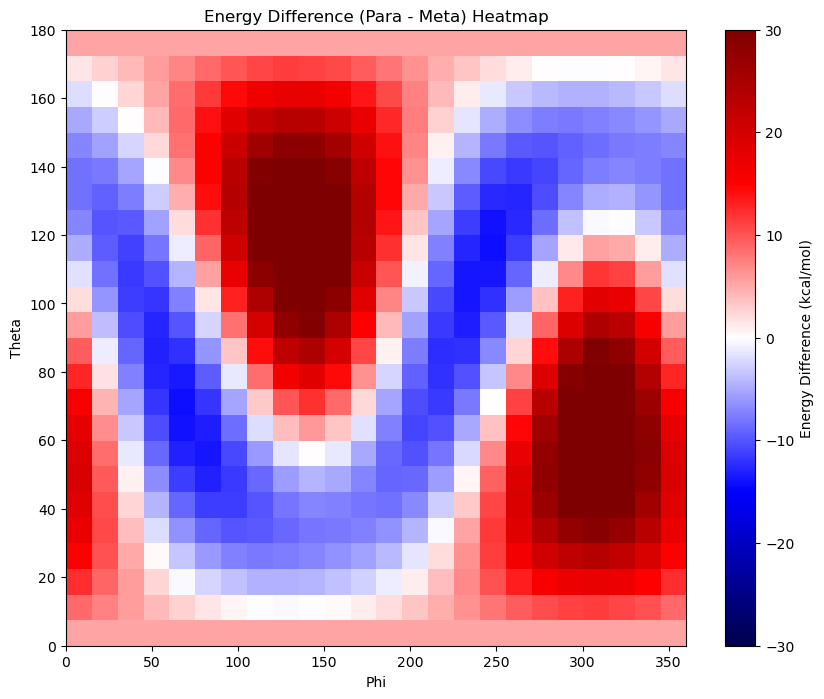

In [15]:
# Plot difference between ortho and meta
plt.figure(figsize=(10, 8))
plt.imshow(diff_pivot_df_ortho_meta, aspect='auto', origin='lower',
           extent=[diff_pivot_df_ortho_meta.columns.min(), diff_pivot_df_ortho_meta.columns.max(),
                   diff_pivot_df_ortho_meta.index.min(), diff_pivot_df_ortho_meta.index.max()],
           cmap='seismic', vmin = -30, vmax = 30) #vmin=-np.max(np.abs(diff_pivot_df_ortho_meta.values)), vmax=np.max(np.abs(diff_pivot_df_ortho_meta.values)))
plt.colorbar(label='Energy Difference (kcal/mol)')
plt.xlabel('Phi')
plt.ylabel('Theta')

plt.title('Energy Difference (Ortho - Meta) Heatmap')
plt.savefig("diff_ortho_meta_points.png", dpi=300)
plt.show()

# Plot difference between ortho and meta
plt.figure(figsize=(10, 8))
plt.imshow(diff_pivot_df_para_meta, aspect='auto', origin='lower',
           extent=[diff_pivot_df_para_meta.columns.min(), diff_pivot_df_para_meta.columns.max(),
                   diff_pivot_df_para_meta.index.min(), diff_pivot_df_para_meta.index.max()],
           cmap='seismic', vmin = -30, vmax = 30) #vmin=-np.max(np.abs(diff_pivot_df_para_meta.values)), vmax=np.max(np.abs(diff_pivot_df_para_meta.values)))
plt.colorbar(label='Energy Difference (kcal/mol)')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy Difference (Para - Meta) Heatmap')
plt.savefig("diff_para_meta_points.png", dpi=300)
plt.show()

In [19]:
from scipy.interpolate import griddata
import numpy as np

# points for each dataset
theta_vals_ortho = ortho_df['theta'].values
phi_vals_ortho   = ortho_df['phi'].values
theta_vals_meta  = meta_df['theta'].values
phi_vals_meta    = meta_df['phi'].values
theta_vals_para  = para_df['theta'].values
phi_vals_para    = para_df['phi'].values

values_ortho = ortho_df['value'].values
values_meta  = meta_df['value'].values
values_para  = para_df['value'].values

# regular grids for each dataset
theta_grid_ortho = np.linspace(theta_vals_ortho.min(), theta_vals_ortho.max(), 24)
phi_grid_ortho   = np.linspace(phi_vals_ortho.min(),   phi_vals_ortho.max(),   24)
TH_ortho, PH_ortho = np.meshgrid(theta_grid_ortho, phi_grid_ortho)

theta_grid_meta = np.linspace(theta_vals_meta.min(), theta_vals_meta.max(), 24)
phi_grid_meta   = np.linspace(phi_vals_meta.min(),   phi_vals_meta.max(),   24)
TH_meta, PH_meta = np.meshgrid(theta_grid_meta, phi_grid_meta)

theta_grid_para = np.linspace(theta_vals_para.min(), theta_vals_para.max(), 24)
phi_grid_para   = np.linspace(phi_vals_para.min(),   phi_vals_para.max(),   24)
TH_para, PH_para = np.meshgrid(theta_grid_para, phi_grid_para)

# interpolate values onto their respective grids
grid_values_ortho = griddata((theta_vals_ortho, phi_vals_ortho), values_ortho, (TH_ortho, PH_ortho), method='linear')
grid_values_meta  = griddata((theta_vals_meta,  phi_vals_meta),  values_meta,  (TH_meta,  PH_meta),  method='linear')
grid_values_para  = griddata((theta_vals_para,  phi_vals_para),  values_para,  (TH_para,  PH_para),  method='linear')

# convert interpolated arrays to DataFrames (index = theta_grid, columns = phi_grid)
meta_pivot_df  = pd.DataFrame(grid_values_meta, index=theta_grid_meta, columns=phi_grid_meta)
para_pivot_df  = pd.DataFrame(grid_values_para, index=theta_grid_para, columns=phi_grid_para)
ortho_pivot_df = pd.DataFrame(grid_values_ortho, index=theta_grid_ortho, columns=phi_grid_ortho)


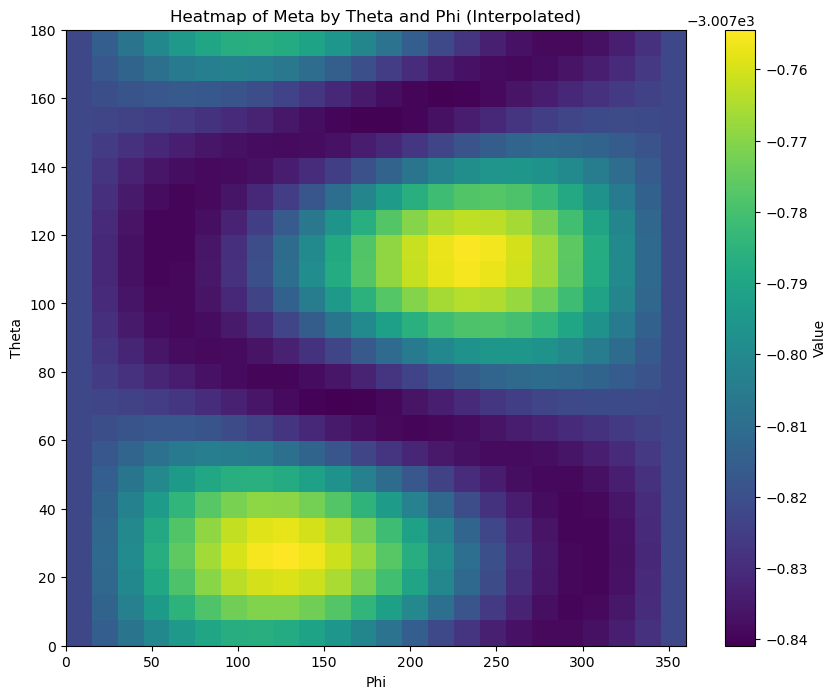

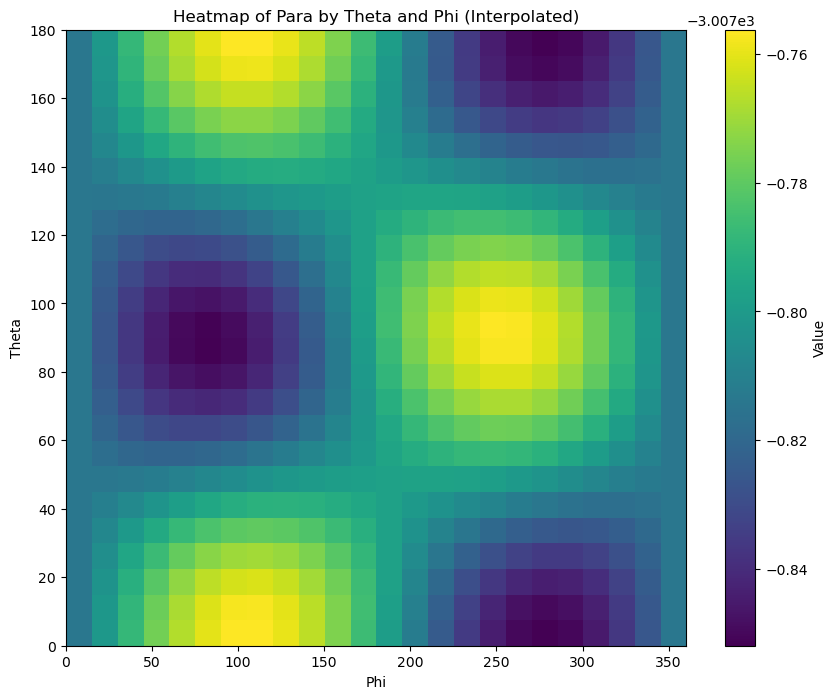

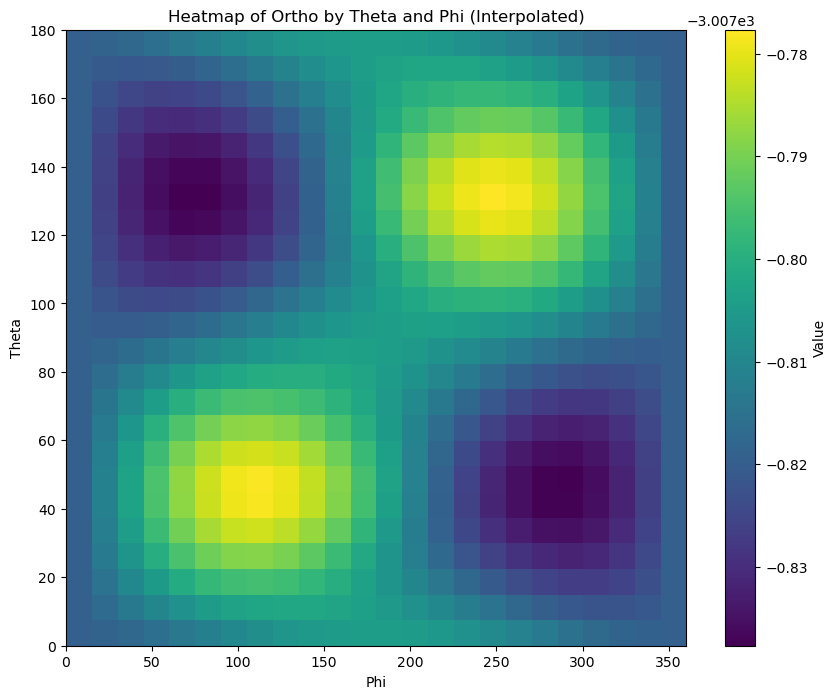

In [20]:
# plot meta heat map using interpolated data
plt.figure(figsize=(10, 8))
plt.imshow(meta_pivot_df, aspect='auto', origin='lower',
           extent=[meta_pivot_df.columns.min(), meta_pivot_df.columns.max(),
                   meta_pivot_df.index.min(), meta_pivot_df.index.max()],
           cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Meta by Theta and Phi (Interpolated)')
plt.savefig("meta_interpolated.png", dpi=300)
plt.show()

# plot para heat map using interpolated data
plt.figure(figsize=(10, 8))
plt.imshow(para_pivot_df, aspect='auto', origin='lower',
           extent=[para_pivot_df.columns.min(), para_pivot_df.columns.max(),
                   para_pivot_df.index.min(), para_pivot_df.index.max()], 
                  cmap='viridis')       
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Para by Theta and Phi (Interpolated)')
plt.savefig("para_interpolated.png", dpi=300)
plt.show() 

# plot ortho heat map using interpolated data
plt.figure(figsize=(10, 8))
plt.imshow(ortho_pivot_df, aspect='auto', origin='lower',
           extent=[ortho_pivot_df.columns.min(), ortho_pivot_df.columns.max(),
                   ortho_pivot_df.index.min(), ortho_pivot_df.index.max()],
           cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Heatmap of Ortho by Theta and Phi (Interpolated)')
plt.savefig("ortho_interpolated.png", dpi=300)
plt.show()

In [17]:
# Compute the energy difference (ortho - meta) and report in kcal/mol
hartree_to_kcalmol = 627.5094740631
diff_pivot_df_ortho_meta = (ortho_pivot_df - meta_pivot_df) * hartree_to_kcalmol

# compute the energy difference (para - meta) and report in kcal/mol
diff_pivot_df_para_meta = (para_pivot_df - meta_pivot_df) * hartree_to_kcalmol


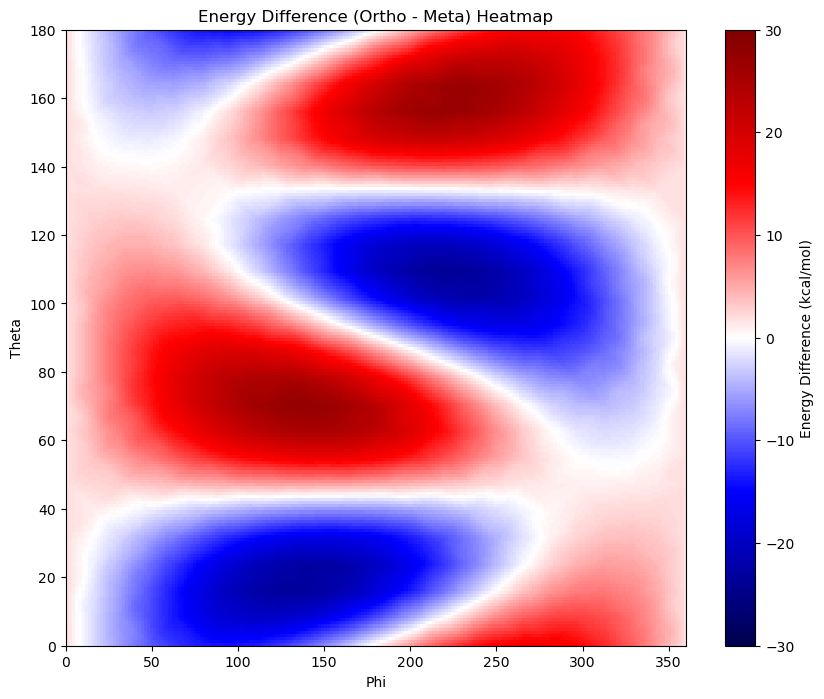

In [18]:
plt.figure(figsize=(10, 8))
plt.imshow(diff_pivot_df_ortho_meta, aspect='auto', origin='lower',
           extent=[diff_pivot_df_ortho_meta.columns.min(), diff_pivot_df_ortho_meta.columns.max(),
                   diff_pivot_df_ortho_meta.index.min(), diff_pivot_df_ortho_meta.index.max()],
           cmap='seismic', vmin = -30, vmax = 30) #vmin=-np.max(np.abs(diff_pivot_df_ortho_meta.values)), vmax=np.max(np.abs(diff_pivot_df_ortho_meta.values)))
plt.colorbar(label='Energy Difference (kcal/mol)')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy Difference (Ortho - Meta) Heatmap')
plt.savefig("diff_ortho_meta.png", dpi=300)

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(
    diff_pivot_df,
    aspect='auto',
    origin='lower',
    extent=[
        diff_pivot_df.columns.min(), diff_pivot_df.columns.max(),
        diff_pivot_df.index.min(), diff_pivot_df.index.max()
    ],
    cmap='coolwarm',      # diverging colormap: red = positive, blue = negative
    vmin=-abs(diff_pivot_df.values).max(),  # center the colorbar at zero
    vmax=abs(diff_pivot_df.values).max()
)
plt.colorbar(label='ΔE (Meta - Para)')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy Difference (Meta - Para) by Theta and Phi')
plt.savefig('meta_minus_para.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(
    diff_pivot_df_mo,
    aspect='auto',
    origin='lower',
    extent=[
        diff_pivot_df_mo.columns.min(), diff_pivot_df_mo.columns.max(),
        diff_pivot_df_mo.index.min(), diff_pivot_df_mo.index.max()
    ],
    cmap='coolwarm',      # diverging colormap: red = positive, blue = negative
    vmin=-abs(diff_pivot_df_mo.values).max(),  # center the colorbar at zero
    vmax=abs(diff_pivot_df_mo.values).max()
)
plt.colorbar(label='ΔE (Meta - Ortho)')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Energy Difference (Meta - Ortho) by Theta and Phi')
plt.savefig('meta_minus_ortho.png', dpi=300)
plt.show()

In [ ]:
import numpy as np
from scipy.interpolate import griddata

# Flatten data for interpolation
meta_flat = meta_df[['theta', 'phi', 'value']].dropna()
para_flat = para_df[['theta', 'phi', 'value']].dropna()

# Merge on (theta, phi) and compute ΔE
merged = pd.merge(meta_flat, para_flat, on=['theta', 'phi'], suffixes=('_meta', '_para'))
merged['deltaE'] = merged['value_meta'] - merged['value_para']

# Interpolate over regular grid
theta_grid = np.linspace(merged['theta'].min(), merged['theta'].max(), 200)
phi_grid = np.linspace(merged['phi'].min(), merged['phi'].max(), 200)
THETA, PHI = np.meshgrid(theta_grid, phi_grid)

Z = griddata(
    (merged['theta'], merged['phi']),
    merged['deltaE'],
    (THETA, PHI),
    method='cubic'
)

plt.figure(figsize=(10, 8))
plt.imshow(
    Z, extent=[phi_grid.min(), phi_grid.max(), theta_grid.min(), theta_grid.max()],
    origin='lower', aspect='auto', cmap='coolwarm',
    vmin=-abs(Z[np.isfinite(Z)]).max(), vmax=abs(Z[np.isfinite(Z)]).max()
)
plt.colorbar(label='ΔE (Meta - Para)')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Interpolated Energy Difference (Meta - Para)')
plt.show()


In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# ---- Read & parse file ----
data = []
with open('META/meta_ccsd_energies.txt', 'r') as f:
    for line in f:
        # Use regex to find theta, phi, and value
        m = re.search(r'theta_([-\d\.eE]+)_phi_([-\d\.eE]+)\.json', line)
        v = re.search(r'([-]?\d+\.\d+(?:[eE][-+]?\d+)?)\s*$', line.strip())
        if m and v:
            theta = float(m.group(1))
            phi = float(m.group(2))
            value = float(v.group(1))
            data.append((theta, phi, value))

meta_df = pd.DataFrame(data, columns=['theta', 'phi', 'value'])
print(meta_df.head(), f"\nParsed {len(meta_df)} valid rows")


In [ ]:
# ---- Create a regular grid ----
theta_grid = np.linspace(meta_df['theta'].min(), meta_df['theta'].max(), 200)
phi_grid = np.linspace(meta_df['phi'].min(), meta_df['phi'].max(), 200)
THETA, PHI = np.meshgrid(theta_grid, phi_grid)

# ---- Interpolate the values ----
Z = griddata(
    points=(meta_df['theta'], meta_df['phi']),
    values=meta_df['value'],
    xi=(THETA, PHI),
    method='cubic'  # 'linear', 'nearest', or 'cubic' for smoothing
)


In [ ]:
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(
    Z, extent=[phi_grid.min(), phi_grid.max(), theta_grid.min(), theta_grid.max()],
    origin='lower', aspect='auto', cmap='inferno'
)
plt.colorbar(heatmap, label='Value')
plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('Interpolated Heatmap of Value vs. Theta and Phi')
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(THETA, PHI, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Value')
ax.set_xlabel('Theta')
ax.set_ylabel('Phi')
ax.set_zlabel('Value')
ax.set_title('3D Surface of Interpolated Data')
plt.show()
